In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# my module
current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '../'))
import calc_BVI

In [2]:
input_folderpath = r"C:\Users\02217013\Documents"
input_filename = "calliance1_nmr.csv"


input_file = os.path.join(input_folderpath, input_filename)
the_df = pd.read_csv(input_file)

the_Pci = 50
m0 = 0.0618
b0 = 1

Poreの測定値のBVIと、xをいろいろ変更してみた時のSpectral BVIの理論値をプロット。
交点におけるxがそのサンプルの適切なx。各グラフに適切なcおよびxを入力した。

In [3]:
graph_bins = 11
x = np.linspace(0, 500, graph_bins)

plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, (key, group) in enumerate(the_df.groupby("ID")):

    # calc_T2_cutoff
    the_t2_cutoff = calc_BVI.calc_cutoff_C(group)

    # calc best x using newton method
    optimized_x = calc_BVI.X_spectral_theoretical(1000, group, the_Pci)

    # plot BVI corresponding x
    BVI_list = [calc_BVI.BVI_spectral(xi, group, the_Pci)[0] for xi in x]
    plt.subplot(5, 4, i+1)
    plt.title("{0}\nC={1}\nx={2}".format(
            key, round(the_t2_cutoff), round(optimized_x)))
    plt.plot(x, BVI_list)
    plt.plot(x, np.ones(graph_bins)*group.BVI_Por_cum.iloc[-1])
    plt.ylim(0, 10)

plt.show()

C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Swi"] = T2i / df.T2.copy() * (2 - T2i / df.T2.copy())
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Swi_dx"] = 2 / (df.T2 * Pci) - 2 * x / (df.T2 * df.T2 * Pci * Pci)
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

AttributeError: module 'calc_BVI' has no attribute 'BVI_spectral'

<Figure size 720x1152 with 0 Axes>

### x vs c　散布図
相関はない。

In [ ]:
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)

for key, group in the_df.groupby("ID"):

    # calc_T2_cutoff
    the_t2_cutoff = calc_BVI.calc_cutoff_C(group)

    # calc best x using newton method
    optimized_x = calc_BVI.X_spectral_theoretical(1000, group, the_Pci)
    
    ID = group["ID"].iloc[0]
    ax1.scatter(the_t2_cutoff, optimized_x)
    ax1.annotate(ID, (the_t2_cutoff, optimized_x), size=8)    

plt.show()

x, c, m, bの平均値を使ったときの、それぞれのtrue BVI vs estimated BVI

break! k1=Calliance_1_142, k2=Calliance_1_143, m=-7.533815022006505e+195, b=1.259536738791175e+195, count=9
break! k1=Calliance_1_142, k2=Calliance_1_148, m=0.039107630468332294, b=1.077292445644859, count=1
break! k1=Calliance_1_142, k2=Calliance_1_22, m=0.03928053191567099, b=1.0785990844954187, count=1
break! k1=Calliance_1_142, k2=Calliance_1_225, m=0.08692933392668695, b=-0.284259757356124, count=1
break! k1=Calliance_1_142, k2=Calliance_1_230, m=0.09205389009439997, b=-0.26558518144141174, count=1
break! k1=Calliance_1_142, k2=Calliance_1_239, m=-4.1575769898250875e+270, b=8.311514742796286e+270, count=9
break! k1=Calliance_1_142, k2=Calliance_1_24, m=0.0367691697308327, b=1.1596805484839083, count=1
break! k1=Calliance_1_142, k2=Calliance_1_270, m=-0.0059967356468621745, b=2.3807281237995204, count=2
break! k1=Calliance_1_142, k2=Calliance_1_275, m=-1906121.9961183104, b=24017137.16175928, count=5
break! k1=Calliance_1_142, k2=Calliance_1_28, m=0.018748851446069095, b=1.63114607

break! k1=Calliance_1_225, k2=Calliance_1_371, m=0.07077394492352057, b=0.3286471827443209, count=3
break! k1=Calliance_1_225, k2=Calliance_1_419, m=0.08282038083535848, b=0.12625888069521274, count=1
break! k1=Calliance_1_225, k2=Calliance_1_441, m=-1.108140281388618e+219, b=7.945520425083944e+218, count=9
break! k1=Calliance_1_225, k2=Calliance_1_52, m=0.04781188442797607, b=1.018164401785028, count=0
break! k1=Calliance_1_225, k2=Calliance_1_53, m=0.031985159217070805, b=2.06715548764031, count=2
break! k1=Calliance_1_230, k2=Calliance_1_239, m=-0.0019755016576863053, b=0.5733090412716891, count=8
break! k1=Calliance_1_230, k2=Calliance_1_24, m=0.059072980634880166, b=1.0490677899399203, count=0
break! k1=Calliance_1_230, k2=Calliance_1_270, m=0.06185779821910864, b=0.9356501329703932, count=0
break! k1=Calliance_1_230, k2=Calliance_1_275, m=-777.0325146021141, b=61696.40618717968, count=3
break! k1=Calliance_1_230, k2=Calliance_1_28, m=0.06528531448770293, b=0.8127869397974596, cou

break! k1=Calliance_1_282, k2=Calliance_1_53, m=6136.932641599925, b=-61369.32453178375, count=4
break! k1=Calliance_1_304, k2=Calliance_1_347, m=0.02972848282788064, b=5.929249869238495, count=4
break! k1=Calliance_1_304, k2=Calliance_1_356, m=0.12290036760854593, b=0.3821301224621294, count=2
break! k1=Calliance_1_304, k2=Calliance_1_371, m=-0.014552748263692636, b=9.192022501073046, count=30
break! k1=Calliance_1_304, k2=Calliance_1_419, m=252419583865.01355, b=-1592659967719.913, count=6
break! k1=Calliance_1_304, k2=Calliance_1_441, m=-2.181051771130595e+179, b=3.967134171581671e+179, count=10
break! k1=Calliance_1_304, k2=Calliance_1_52, m=-2.346660912972566e+225, b=-1.862429296009973e+224, count=8
break! k1=Calliance_1_304, k2=Calliance_1_53, m=0.13216130148498842, b=0.20709208339670654, count=2
break! k1=Calliance_1_347, k2=Calliance_1_356, m=0.11713781927479659, b=0.017832061349799828, count=1
break! k1=Calliance_1_347, k2=Calliance_1_419, m=2098557609.916988, b=-20985576099.1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Swi"] = 1 / (m * df.T2.copy() + b)
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

NameError: name 'ax2' is not defined

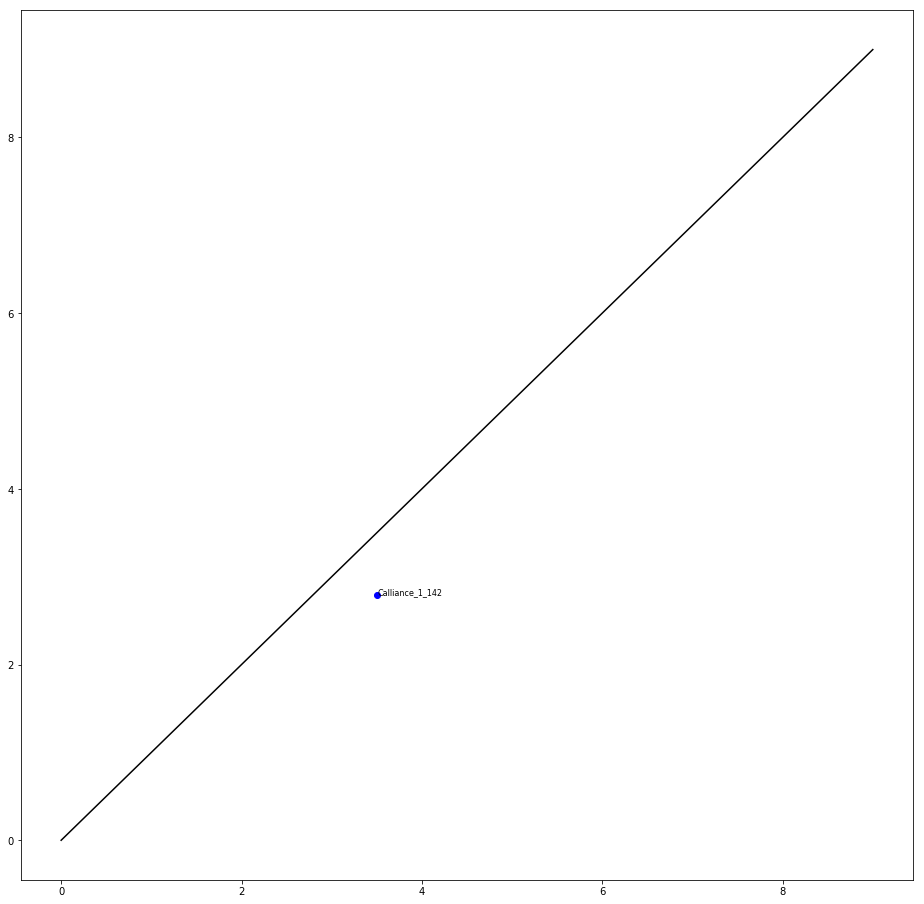

In [7]:

# calc averaged C and averaged X
t2_cutoff_list = []
optimized_x_list = []

for i, (key, group) in enumerate(the_df.groupby("ID")):

    # calc_T2_cutoff
    the_t2_cutoff = calc_BVI.calc_cutoff_C(group)
    t2_cutoff_list.append(the_t2_cutoff)

    # calc best x using newton method
    optimized_x = calc_BVI.X_spectral_theoretical(1000, group, the_Pci)
    optimized_x_list.append(optimized_x)

averaged_c = np.mean(np.array(t2_cutoff_list))
averaged_x = np.mean(np.array(optimized_x_list))

# 経験式使用時の最適m, bの平均値を計算
m_list, b_list, optimized_m, optimized_b = calc_BVI.m_b_spectral_empirical(the_df, m0, b0)

print("averaged_c={0}".format(averaged_c))
print("averaged_x={0}".format(averaged_x))
print("averaged_m={0}".format(optimized_m))
print("averaged_b={0}".format(optimized_b))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


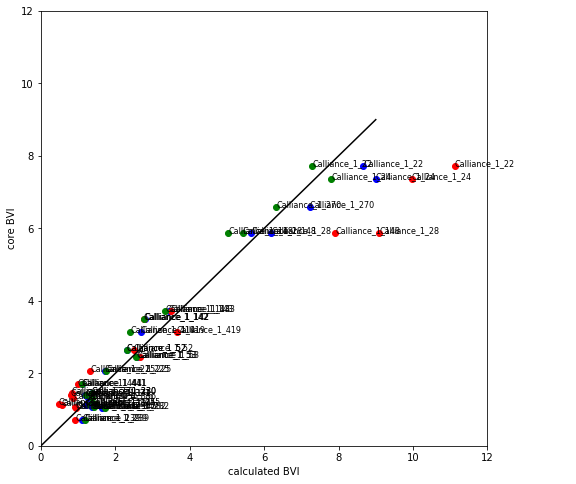

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)

# x = yのライン
a = np.arange(0, 10)
ax.plot(a, a, color="black")

# calc permeaility from averaged c,x and m, b to plot
for key, group in the_df.groupby("ID"):
    
    BVI_theoretical, BVI_theoretical_dx = calc_BVI.BVI_spectral_theoretical(averaged_x, group, the_Pci)
    cutoff_BVI = calc_BVI.BVI_cutoff(group, averaged_c)
    BVI_empirical, BVI_empirical_dm, BVI_empirical_db = calc_BVI.BVI_spectral_empirical(group, optimized_m, optimized_b)
    
    core_BVI = group.BVI_Por_cum.iloc[-1]

    # core BVI vs spectral BVI
    ax.scatter(BVI_theoretical, core_BVI, c="blue")
    ax.annotate(key, (BVI_theoretical, core_BVI), size=8)
    
    ax.scatter(cutoff_BVI, core_BVI, c="red")
    ax.annotate(key, (cutoff_BVI, core_BVI), size=8)
    
    ax.scatter(BVI_empirical, core_BVI, c="green")
    ax.annotate(key, (BVI_empirical, core_BVI), size=8)

plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel('calculated BVI')
plt.ylabel('core BVI')
plt.show()